In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

pokemon_df = pd.read_csv("../../data/pokemon.csv")

ansur_male = pd.read_csv("../../data/ANSUR_II_MALE.csv")
ansur_female = pd.read_csv("../../data/ANSUR_II_FEMALE.csv")

## Train - test split
### In this chapter, you will keep working with the ANSUR dataset. Before you can build a model on your dataset, you should first decide on which feature you want to predict. In this case, you're trying to predict gender.

### You need to extract the column holding this feature from the dataset and then split the data into a training and test set. The training set will be used to train the model and the test set will be used to check its performance on unseen data.

### ansur_df has been pre-loaded for you.

### Instructions
-    Import the train_test_split function from sklearn.model_selection.
-    Assign the 'Gender' column to y.
-    Remove the 'Gender' column from the DataFrame and assign the result to X.
-    Set the test size to 30% to perform a 70% train and 30% test data split.

In [2]:
ansur = pd.concat([ansur_male, ansur_female])

cols = ['Gender', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength',
       'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight',
       'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'wristcircumference', 'wristheight', 'weight_kg']
ansur_df = ansur[cols]

In [3]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"{X_test.shape[0]} rows in test set vs. {X_train.shape[0]} in training set, {X_test.shape[1]} Features.")

1821 rows in test set vs. 4247 in training set, 92 Features.


## Fitting and testing the model
### In the previous exercise, you split the dataset into X_train, X_test, y_train, and y_test. These datasets have been pre-loaded for you. You'll now create a support vector machine classifier model (SVC()) and fit that to the training data. You'll then calculate the accuracy on both the test and training set to detect overfitting.

### Instructions
-    Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
-    Create an instance of the Support Vector Classification class (SVC()).
-    Fit the model to the training data.
-    Calculate accuracy scores on both train and test data.

In [4]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

99.1% accuracy on test set vs. 98.9% on training set


## Accuracy after dimensionality reduction
### You'll reduce the overfit with the help of dimensionality reduction. In this case, you'll apply a rather drastic form of dimensionality reduction by only selecting a single column that has some good information to distinguish between genders. You'll repeat the train-test split, model fit and prediction steps to compare the accuracy on test versus training data.

### All relevant packages and y have been pre-loaded.

### Instructions
-    Select just the neck circumference ('neckcircumferencebase') column from ansur_df.
-    Split the data, instantiate a classifier and fit the data. This has been done for you.
-    Once again calculate the accuracy scores on both training and test set.

In [5]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

93.7% accuracy on test set vs. 93.1% on training set


## Finding a good variance threshold
### You'll be working on a slightly modified subsample of the ANSUR dataset with just head measurements pre-loaded as head_df.

### Instructions 1/4
-    Create a boxplot on head_df.

In [6]:
head_df = ansur[["headbreadth", "headcircumference", "headlength", "tragiontopofhead"]]
head_df["n_hairs"] = head_df["headbreadth"] + head_df["headcircumference"] + head_df["headlength"] + head_df["tragiontopofhead"]
head_df["measurement_error"] = (head_df["headbreadth"] + head_df["headcircumference"] + head_df["headlength"] + head_df["tragiontopofhead"]) / head_df["n_hairs"].mean()

/tmp/ipykernel_778341/1203532231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_df["n_hairs"] = head_df["headbreadth"] + head_df["headcircumference"] + head_df["headlength"] + head_df["tragiontopofhead"]
/tmp/ipykernel_778341/1203532231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_df["measurement_error"] = (head_df["headbreadth"] + head_df["headcircumference"] + head_df["headlength"] + head_df["tragiontopofhead"]) / head_df["n_hairs"].mean()


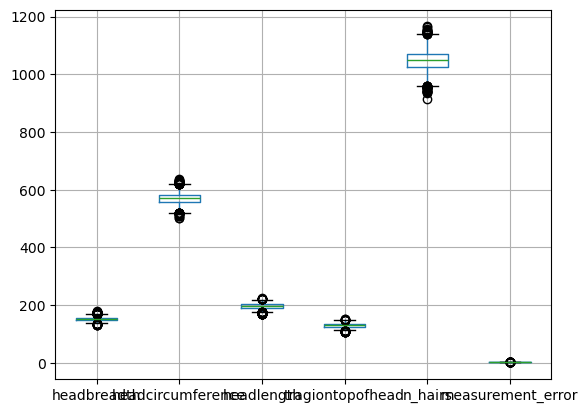

In [7]:
# Create the boxplot
head_df.boxplot()

plt.show()

### Instructions 2/4
-    Normalize the data by dividing the DataFrame with its mean values.

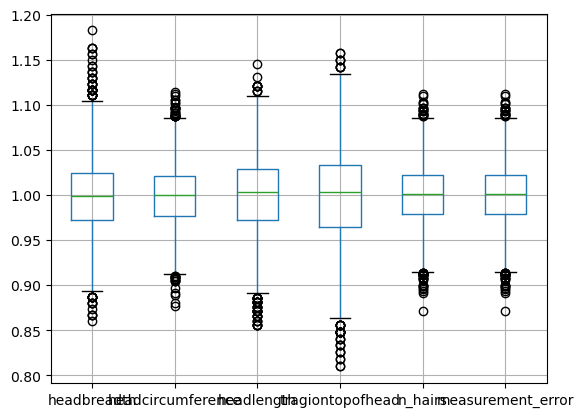

In [8]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

### Instructions 3/4
-    Print the variances of the normalized data.

In [9]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          0.001679
headcircumference    0.001030
headlength           0.001868
tragiontopofhead     0.002640
n_hairs              0.001013
measurement_error    0.001013
dtype: float64


## Features with low variance
### In the previous exercise you established that 0.001 is a good threshold to filter out low variance features in head_df after normalization. Now use the VarianceThreshold feature selector to remove these features.

### Instructions
-    Create the variance threshold selector with a threshold of 0.001.
-    Normalize the head_df DataFrame by dividing it by its mean values and fit the selector.
-    Create a boolean mask from the selector using .get_support().
-    Create a reduced DataFrame by passing the mask to the .loc[] method.

In [10]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced DataFrame
reduced_df = head_df.loc[:, mask]

print(f"Dimensionality reduced from {head_df.shape[1]} to {reduced_df.shape[1]}.")

Dimensionality reduced from 6 to 6.


## Removing features with many missing values
### You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as school_df. Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.

### Instructions 2/2
-    Create a boolean mask on whether each feature has less than 50% missing values.
-    Apply the mask to school_df to select columns without many missing values.

In [12]:
school_df = pd.read_csv("../../data/Public_Schools2.csv")

In [13]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


## Visualizing the correlation matrix
### Reading the correlation matrix of ansur_df in its raw, numeric format doesn't allow us to get a quick overview. Let's improve this by removing redundant values and visualizing the matrix using seaborn.

### Seaborn has been pre-loaded as sns, matplotlib.pyplot as plt, NumPy as np and pandas as pd.

### Instructions 1/4
-    Create the correlation matrix.
-    Visualize it using Seaborn's heatmap function.

In [14]:
ansur_df = pd.concat([ansur_male, ansur_female])
ansur_df.columns

ansur_df = ansur_df[["elbowrestheight", "wristcircumference", "anklecircumference", "buttockheight", "crotchheight"]]
ansur_df["Elbow rest height"] = ansur_df["elbowrestheight"]
ansur_df["Wrist circumference"] = ansur_df["wristcircumference"]
ansur_df["Ankle circumference"] = ansur_df["anklecircumference"]
ansur_df["Buttock height"] = ansur_df["buttockheight"]
ansur_df["Crotch height"] = ansur_df["crotchheight"]
ansur_df = ansur_df.drop(["elbowrestheight", "wristcircumference", "anklecircumference", "buttockheight", "crotchheight"], axis=1)

cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

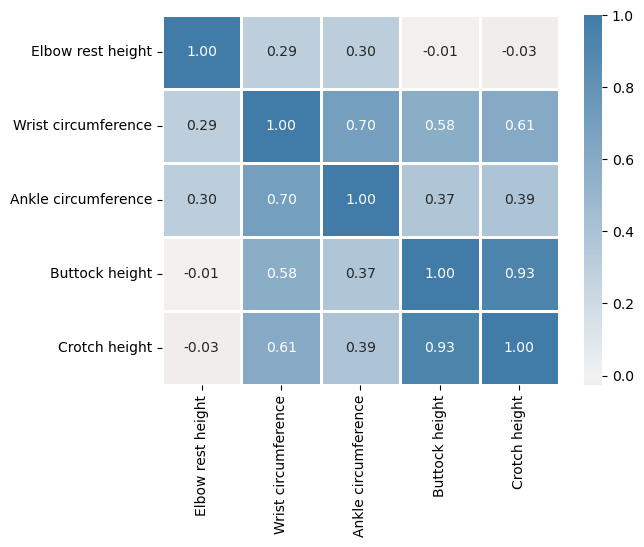

In [15]:
# Create the correlation matrix
corr = ansur_df.corr()

# Draw a heatmap of the correlation matrix
sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

### Instructions 2/4
-    Create a boolean mask for the upper triangle of the plot.

In [16]:
# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

print(mask)

[[ True  True  True  True  True]
 [False  True  True  True  True]
 [False False  True  True  True]
 [False False False  True  True]
 [False False False False  True]]


### Instructions 3/4
-    Add the mask to the heatmap.

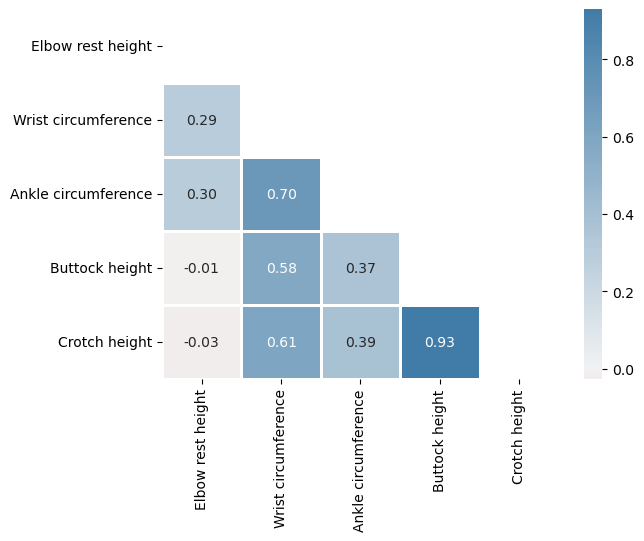

In [17]:
# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

## Filtering out highly correlated features
### You're going to automate the removal of highly correlated features in the numeric ANSUR dataset. You'll calculate the correlation matrix and filter out columns that have a correlation coefficient of more than 0.95 or less than -0.95.

### Since each correlation coefficient occurs twice in the matrix (correlation of A to B equals correlation of B to A) you'll want to ignore half of the correlation matrix so that only one of the two correlated features is removed. Use a mask trick for this purpose.

### Instructions
-    Calculate the correlation matrix of ansur_df and take the absolute value of this matrix.
-    Create a boolean mask with True values in the upper right triangle and apply it to the correlation matrix.
-    Set the correlation coefficient threshold to 0.95.
-    Drop all the columns listed in to_drop from the DataFrame.

In [18]:
ansur_df = pd.concat([ansur_male, ansur_female])
## For some reason, when I run corr with string columns it crashes.  So I'm excluding them
ansur_df = ansur_df.drop(["Branch", "Component", "Gender", "BMI_class", "Height_class"], axis=1)

In [19]:
# Calculate the correlation matrix and take the absolute value
corr_df = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print(f"The reduced_df DataFrame has {reduced_df.shape[1]} columns.")

The reduced_df DataFrame has 75 columns.


## Nuclear energy and pool drownings
### The dataset that has been pre-loaded for you as weird_df contains actual data provided by the US Centers for Disease Control & Prevention and Department of Energy.

### Let's see if we can find a pattern.

### Seaborn has been pre-loaded as sns and matplotlib.pyplot as plt.

### Instructions 1/4
-    Print the first five lines of weird_df.

In [20]:
weird_df = pd.DataFrame({ "pool_drownings": [421, 465, 494, 538, 430, 530, 511, 600, 582, 605, 603], 
                         "nuclear_energy": [728.3, 753.9, 768.8, 780.1, 763.7, 788.5, 782.0, 787.2, 806.4, 806.2, 798.9,] })

In [21]:
# Print the first five lines of weird_df
print(weird_df.head())

   pool_drownings  nuclear_energy
0             421           728.3
1             465           753.9
2             494           768.8
3             538           780.1
4             430           763.7


### Instructions 2/4
-    Create a scatterplot with nuclear energy production on the x-axis and the number of pool drownings on the y-axis.

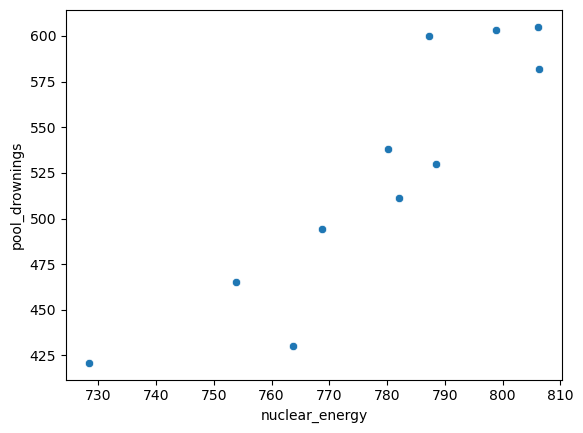

In [22]:
# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x="nuclear_energy", y="pool_drownings", data=weird_df)
plt.show()

### Instructions 3/4
-    Print out the correlation matrix of weird_df.

In [23]:
# Print out the correlation matrix of weird_df
print(weird_df.corr())

                pool_drownings  nuclear_energy
pool_drownings        1.000000        0.901179
nuclear_energy        0.901179        1.000000
